# Prediction and Spatial Distribution of Arrested Individual Characteristics in SQF, New York City

Maidi Xu, 20063089

# Introduction
This research aims to analyze the data collected by the stop-question-and-frisk program in New York. In the data given by each police precinct throughout 2020, each column represents the characteristics of the individual and the boolean output of whether it is stopped question or frisk. At this point, the research direction will be defined by whether it can predict the characteristics of arrested individuals and the distribution of people who are arrested in New York City.

The output of the value point is: For predicting the characteristics of arrested individuals in various branches of New York, under the premise that there is no ethical problem entirely based on data, are there specific characteristics that are more likely to be stopped arrested? This can effectively reflect the social situation of the city. And the distribution of the arrested groups can be analyzed in combination with other spatial factors, and a reasonable argument can be given.

# Literature review
According to the article Disproportionate and Discriminatory[1]: Reviewing the evidence on police stop and search, statistics show that the disproportionate use of power against blacks is a sign of illegal racial discrimination. If stop and search powers cannot be effectively regulated, it is unreasonable to continue to use them. Therefore, the literature prompted the extension of this research topic to analyze and predict social problems under the premise of being completely data-based.

Based on the literature [2], it can be demonstrated that combining event correlations (which can be subdivided into individual characteristics) with spatial predictors can enhance the prediction of future crimes by existing methods. This is also an essential basis for studying the spatial distribution of the arrested population. When combining the characteristics of individuals arrested and the spatial distribution of groups, it is possible to predict the evaluation criteria of the police department effectively.

# Research question
How to accurately predict which individual characteristics people will be, stopped, frisked, and arrested. Which models can be used to predict more accurately? The study is not only a study of individual characteristics but also includes macroscopic observations. For example, importing the population of each precinct area in New York City and the probability of being arrested can propose a spatial correlation between the two. Using different clustering models, are there differences in the presented models?

# Presentation of data

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2022-04-21 15:13:56


## Import the Data
The study required three databases, including two csv files and a shapefile. The csv files are the individual characteristics of sqf and the population of each precinct, respectively. Shapefiles are used for subsequent mapping and for spatial joins.
The study required three databases, including two csv files and a shapefile. The csv files are the individual characteristics of sqf and the population of each precinct, respectively. Shapefiles are used for subsequent mapping and for spatial joins.

### CSV file (sqf-2020)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places

In [94]:
original_data=pd.read_csv('sqf-2020.csv')
## https://github.com/ucfnmxu/dsss_2022/blob/main/sqf-2020.csv

In [4]:
original_data

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,01/01/2020,01:12:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
1,2,01/01/2020,01:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
2,3,01/01/2020,01:11:00,2020,January,Wednesday,Based on Radio Run,APP,POM,19,...,19,C,(null),248 E 83 ST,E 83 ST,997094,222002,10028,PBMN,MANHATTAN
3,4,01/01/2020,10:18:00,2020,January,Wednesday,Based on Radio Run,APP,POM,75,...,75,D,(null),LINDEN BLVD && SHEPHERD AVE,LINDEN BLVD,1018441,181412,11208,PBBN,BROOKLYN
4,5,01/01/2020,08:45:00,2020,January,Wednesday,Based on Radio Run,APP,POM,78,...,78,B,(null),481 5 AVE,5 AVE,987763,182543,11215,PBBS,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,9540,31/12/2020,00:20:00,2020,December,Thursday,Based on Radio Run,APP,POM,72,...,72,D,(null),375 57 ST,57 ST,979566,173464,11220,PBBS,BROOKLYN
9540,9541,29/12/2020,17:11:00,2020,December,Tuesday,Based on Radio Run,APP,CPT,78,...,71,B,(null),749 CROWN ST,CROWN ST,1002918,181721,11213,PBBS,BROOKLYN
9541,9542,12/12/2020,01:45:00,2020,December,Saturday,Based on Self Initiated,APP,POM,75,...,73,C,(null),424 MOTHER GASTON BLVD,MOTHER GASTON BLVD,1010145,182898,11212,PBBN,BROOKLYN
9542,9543,25/12/2020,15:45:00,2020,December,Friday,Based on Radio Run,APP,POM,73,...,73,A,(null),BROADWAY && HALSEY ST,BROADWAY,1007368,189362,(null),PBBN,BROOKLYN


In [5]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 83 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   STOP_ID                                                     9544 non-null   int64 
 1   STOP_FRISK_DATE                                             9544 non-null   object
 2   STOP_FRISK_TIME                                             9544 non-null   object
 3   YEAR2                                                       9544 non-null   int64 
 4   MONTH2                                                      9544 non-null   object
 5   DAY2                                                        9544 non-null   object
 6   STOP_WAS_INITIATED                                          9544 non-null   object
 7   RECORD_STATUS_CODE                                          9544 non-null   object
 8   ISSUING_

It can be found that in the csv file of sqf-2020, 83 features are recorded for each sqf event. Only certain personal characteristics are required in the study eg: 'STOP_FRISK_DATE', 'STOP_FRISK_TIME','DAY2','STOP_DURATION_MINUTES','OFFICER_EXPLAINED_STOP_FLAG','FRISKED_FLAG','SEARCHED_FLAG','ASK_FOR_CONSENT_FLG','SUSPECT_ARRESTED_FLAG','WEAPON_FOUND_FLAG', 'DEMEANOR_OF_PERSON_STOPPED','SUSPECT_REPORTED_AGE','SUSPECT_SEX','SUSPECT_RACE_DESCRIPTION','SUSPECT_BODY_BUILD_TYPE','STOP_LOCATION_X','STOP_LOCATION_Y','STOP_LOCATION_BORO_NAME'. So the next step is to directly select the above column and name the variable data.

In [6]:
data = original_data[['STOP_FRISK_DATE', 'STOP_FRISK_TIME','DAY2','STOP_DURATION_MINUTES','OFFICER_EXPLAINED_STOP_FLAG','FRISKED_FLAG','SEARCHED_FLAG','ASK_FOR_CONSENT_FLG','SUSPECT_ARRESTED_FLAG','WEAPON_FOUND_FLAG','DEMEANOR_OF_PERSON_STOPPED','SUSPECT_REPORTED_AGE','SUSPECT_SEX','SUSPECT_RACE_DESCRIPTION','SUSPECT_BODY_BUILD_TYPE','STOP_LOCATION_X','STOP_LOCATION_Y','STOP_LOCATION_BORO_NAME']]


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   STOP_FRISK_DATE              9544 non-null   object
 1   STOP_FRISK_TIME              9544 non-null   object
 2   DAY2                         9544 non-null   object
 3   STOP_DURATION_MINUTES        9544 non-null   int64 
 4   OFFICER_EXPLAINED_STOP_FLAG  9544 non-null   object
 5   FRISKED_FLAG                 9544 non-null   object
 6   SEARCHED_FLAG                9544 non-null   object
 7   ASK_FOR_CONSENT_FLG          9544 non-null   object
 8   SUSPECT_ARRESTED_FLAG        9544 non-null   object
 9   WEAPON_FOUND_FLAG            9544 non-null   object
 10  DEMEANOR_OF_PERSON_STOPPED   8751 non-null   object
 11  SUSPECT_REPORTED_AGE         9544 non-null   object
 12  SUSPECT_SEX                  9544 non-null   object
 13  SUSPECT_RACE_DESCRIPTION     9544

### SHAPEFILE (Police Precinct)

In [8]:
import geopandas as gpd

gdf = gpd.read_file('geo_export_1e43a12b-2473-4922-a8f0-580cd10da982.shp')
gdf.set_crs(epsg=4326, inplace=True)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   precinct    77 non-null     float64 
 1   shape_area  77 non-null     float64 
 2   shape_leng  77 non-null     float64 
 3   geometry    77 non-null     geometry
dtypes: float64(3), geometry(1)
memory usage: 2.5 KB


### CSV (precinct_2020 population)

In [95]:
pop_data=pd.read_csv('nyc_precinct_2020pop.csv')
## https://github.com/ucfnmxu/dsss_2022/blob/main/nyc_precinct_2020pop.csv
pop_data = pop_data[['precinct','P1_001N']]

pop_data

,precinct,P1_001N
0,1,84799
1,5,50598
2,6,64643
3,7,57985
4,9,75951
5,10,65570
6,13,100050
7,14,28050
8,17,89367
9,18,67528


In [10]:
gdf

,precinct,shape_area,shape_leng,geometry
0,1.0000,"47,314,020.1300","80,963.4952","MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,5.0000,"18,088,797.9642","18,676.1243","POLYGON ((-73.98864 40.72293, -73.98869 40.722..."
2,6.0000,"22,098,189.5606","26,402.8998","POLYGON ((-73.99968 40.73855, -73.99684 40.737..."
3,71.0000,"45,331,787.1744","29,978.0943","POLYGON ((-73.92854 40.66457, -73.92872 40.664..."
4,72.0000,"104,622,705.8350","88,402.0460","POLYGON ((-73.99841 40.67187, -73.99830 40.671..."
5,7.0000,"18,364,020.9417","17,301.3084","POLYGON ((-73.97345 40.71896, -73.97351 40.718..."
6,9.0000,"21,394,233.5887","19,773.2330","POLYGON ((-73.97161 40.72672, -73.97163 40.726..."
7,22.0000,"38,301,388.6636","32,701.3492","POLYGON ((-73.94923 40.79687, -73.94942 40.796..."
8,10.0000,"27,267,320.7968","40,281.5280","POLYGON ((-74.00139 40.76285, -74.00051 40.762..."
9,13.0000,"29,508,893.7151","27,719.1719","POLYGON ((-73.98156 40.74388, -73.97996 40.743..."


## Data Preprocessing
### csv file (sqf-2020)
As code showing below, drop null value in 'STOP_LOCATION_X' and 'STOP_LOCATION_Y' and combine two columns as geometry style with csr = 'EPSG:2908'

In [11]:
data.drop(data.loc[data['STOP_LOCATION_X']==0].index, inplace=True)
data.drop(data.loc[data['STOP_LOCATION_Y']==0].index, inplace=True)
data_geo = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.STOP_LOCATION_X , data.STOP_LOCATION_Y),crs='EPSG:2908'
)
data_geo

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,STOP_FRISK_DATE,STOP_FRISK_TIME,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,geometry
0,01/01/2020,01:12:00,Wednesday,2,Y,Y,Y,N,Y,Y,CALM,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (997094.000 222002.000)
1,01/01/2020,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,COMPLIANT,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (997094.000 222002.000)
2,01/01/2020,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,COMPLIANT,17,MALE,WHITE HISPANIC,MED,997094,222002,MANHATTAN,POINT (997094.000 222002.000)
3,01/01/2020,10:18:00,Wednesday,10,Y,Y,Y,Y,Y,N,COOPERATIVE,33,MALE,BLACK,MED,1018441,181412,BROOKLYN,POINT (1018441.000 181412.000)
4,01/01/2020,08:45:00,Wednesday,15,Y,N,N,N,N,N,UPSET,40,FEMALE,WHITE,MED,987763,182543,BROOKLYN,POINT (987763.000 182543.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,31/12/2020,00:20:00,Thursday,10,Y,Y,Y,N,Y,N,CONFUSED,22,MALE,WHITE HISPANIC,MED,979566,173464,BROOKLYN,POINT (979566.000 173464.000)
9540,29/12/2020,17:11:00,Tuesday,6,Y,N,N,N,N,N,CALM,48,MALE,BLACK,THN,1002918,181721,BROOKLYN,POINT (1002918.000 181721.000)
9541,12/12/2020,01:45:00,Saturday,2,Y,Y,Y,N,Y,Y,NaN,16,MALE,BLACK,THN,1010145,182898,BROOKLYN,POINT (1010145.000 182898.000)
9542,25/12/2020,15:45:00,Friday,5,Y,N,N,N,N,N,UPSET,60,MALE,BLACK,THN,1007368,189362,BROOKLYN,POINT (1007368.000 189362.000)


Convert 'EPSG:2908' to "epsg:4326".

In [12]:
data_geo= data_geo.to_crs("epsg:4326")
data_geo

,STOP_FRISK_DATE,STOP_FRISK_TIME,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,geometry
0,01/01/2020,01:12:00,Wednesday,2,Y,Y,Y,N,Y,Y,CALM,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (-73.95363 40.77602)
1,01/01/2020,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,COMPLIANT,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (-73.95363 40.77602)
2,01/01/2020,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,COMPLIANT,17,MALE,WHITE HISPANIC,MED,997094,222002,MANHATTAN,POINT (-73.95363 40.77602)
3,01/01/2020,10:18:00,Wednesday,10,Y,Y,Y,Y,Y,N,COOPERATIVE,33,MALE,BLACK,MED,1018441,181412,BROOKLYN,POINT (-73.87676 40.66455)
4,01/01/2020,08:45:00,Wednesday,15,Y,N,N,N,N,N,UPSET,40,FEMALE,WHITE,MED,987763,182543,BROOKLYN,POINT (-73.98734 40.66772)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,31/12/2020,00:20:00,Thursday,10,Y,Y,Y,N,Y,N,CONFUSED,22,MALE,WHITE HISPANIC,MED,979566,173464,BROOKLYN,POINT (-74.01688 40.64280)
9540,29/12/2020,17:11:00,Tuesday,6,Y,N,N,N,N,N,CALM,48,MALE,BLACK,THN,1002918,181721,BROOKLYN,POINT (-73.93271 40.66545)
9541,12/12/2020,01:45:00,Saturday,2,Y,Y,Y,N,Y,Y,NaN,16,MALE,BLACK,THN,1010145,182898,BROOKLYN,POINT (-73.90666 40.66866)
9542,25/12/2020,15:45:00,Friday,5,Y,N,N,N,N,N,UPSET,60,MALE,BLACK,THN,1007368,189362,BROOKLYN,POINT (-73.91664 40.68641)


In [13]:
data_geo['lon'] = data_geo.geometry.x
data_geo['lat'] = data_geo.geometry.y
data_geo

,STOP_FRISK_DATE,STOP_FRISK_TIME,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,...,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,geometry,lon,lat
0,01/01/2020,01:12:00,Wednesday,2,Y,Y,Y,N,Y,Y,...,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (-73.95363 40.77602),-73.9536,40.7760
1,01/01/2020,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,...,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (-73.95363 40.77602),-73.9536,40.7760
2,01/01/2020,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,...,17,MALE,WHITE HISPANIC,MED,997094,222002,MANHATTAN,POINT (-73.95363 40.77602),-73.9536,40.7760
3,01/01/2020,10:18:00,Wednesday,10,Y,Y,Y,Y,Y,N,...,33,MALE,BLACK,MED,1018441,181412,BROOKLYN,POINT (-73.87676 40.66455),-73.8768,40.6646
4,01/01/2020,08:45:00,Wednesday,15,Y,N,N,N,N,N,...,40,FEMALE,WHITE,MED,987763,182543,BROOKLYN,POINT (-73.98734 40.66772),-73.9873,40.6677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,31/12/2020,00:20:00,Thursday,10,Y,Y,Y,N,Y,N,...,22,MALE,WHITE HISPANIC,MED,979566,173464,BROOKLYN,POINT (-74.01688 40.64280),-74.0169,40.6428
9540,29/12/2020,17:11:00,Tuesday,6,Y,N,N,N,N,N,...,48,MALE,BLACK,THN,1002918,181721,BROOKLYN,POINT (-73.93271 40.66545),-73.9327,40.6654
9541,12/12/2020,01:45:00,Saturday,2,Y,Y,Y,N,Y,Y,...,16,MALE,BLACK,THN,1010145,182898,BROOKLYN,POINT (-73.90666 40.66866),-73.9067,40.6687
9542,25/12/2020,15:45:00,Friday,5,Y,N,N,N,N,N,...,60,MALE,BLACK,THN,1007368,189362,BROOKLYN,POINT (-73.91664 40.68641),-73.9166,40.6864


In [14]:
data_geo.drop(data_geo.loc[data_geo['lon'] < -75].index, inplace=True)
data_geo

,STOP_FRISK_DATE,STOP_FRISK_TIME,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,...,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,geometry,lon,lat
0,01/01/2020,01:12:00,Wednesday,2,Y,Y,Y,N,Y,Y,...,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (-73.95363 40.77602),-73.9536,40.7760
1,01/01/2020,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,...,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (-73.95363 40.77602),-73.9536,40.7760
2,01/01/2020,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,...,17,MALE,WHITE HISPANIC,MED,997094,222002,MANHATTAN,POINT (-73.95363 40.77602),-73.9536,40.7760
3,01/01/2020,10:18:00,Wednesday,10,Y,Y,Y,Y,Y,N,...,33,MALE,BLACK,MED,1018441,181412,BROOKLYN,POINT (-73.87676 40.66455),-73.8768,40.6646
4,01/01/2020,08:45:00,Wednesday,15,Y,N,N,N,N,N,...,40,FEMALE,WHITE,MED,987763,182543,BROOKLYN,POINT (-73.98734 40.66772),-73.9873,40.6677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,31/12/2020,00:20:00,Thursday,10,Y,Y,Y,N,Y,N,...,22,MALE,WHITE HISPANIC,MED,979566,173464,BROOKLYN,POINT (-74.01688 40.64280),-74.0169,40.6428
9540,29/12/2020,17:11:00,Tuesday,6,Y,N,N,N,N,N,...,48,MALE,BLACK,THN,1002918,181721,BROOKLYN,POINT (-73.93271 40.66545),-73.9327,40.6654
9541,12/12/2020,01:45:00,Saturday,2,Y,Y,Y,N,Y,Y,...,16,MALE,BLACK,THN,1010145,182898,BROOKLYN,POINT (-73.90666 40.66866),-73.9067,40.6687
9542,25/12/2020,15:45:00,Friday,5,Y,N,N,N,N,N,...,60,MALE,BLACK,THN,1007368,189362,BROOKLYN,POINT (-73.91664 40.68641),-73.9166,40.6864


In [15]:
data_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9540 entries, 0 to 9543
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   STOP_FRISK_DATE              9540 non-null   object  
 1   STOP_FRISK_TIME              9540 non-null   object  
 2   DAY2                         9540 non-null   object  
 3   STOP_DURATION_MINUTES        9540 non-null   int64   
 4   OFFICER_EXPLAINED_STOP_FLAG  9540 non-null   object  
 5   FRISKED_FLAG                 9540 non-null   object  
 6   SEARCHED_FLAG                9540 non-null   object  
 7   ASK_FOR_CONSENT_FLG          9540 non-null   object  
 8   SUSPECT_ARRESTED_FLAG        9540 non-null   object  
 9   WEAPON_FOUND_FLAG            9540 non-null   object  
 10  DEMEANOR_OF_PERSON_STOPPED   8748 non-null   object  
 11  SUSPECT_REPORTED_AGE         9540 non-null   object  
 12  SUSPECT_SEX                  9540 non-null   object  


In [16]:
data_geo.dropna()
data_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9540 entries, 0 to 9543
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   STOP_FRISK_DATE              9540 non-null   object  
 1   STOP_FRISK_TIME              9540 non-null   object  
 2   DAY2                         9540 non-null   object  
 3   STOP_DURATION_MINUTES        9540 non-null   int64   
 4   OFFICER_EXPLAINED_STOP_FLAG  9540 non-null   object  
 5   FRISKED_FLAG                 9540 non-null   object  
 6   SEARCHED_FLAG                9540 non-null   object  
 7   ASK_FOR_CONSENT_FLG          9540 non-null   object  
 8   SUSPECT_ARRESTED_FLAG        9540 non-null   object  
 9   WEAPON_FOUND_FLAG            9540 non-null   object  
 10  DEMEANOR_OF_PERSON_STOPPED   8748 non-null   object  
 11  SUSPECT_REPORTED_AGE         9540 non-null   object  
 12  SUSPECT_SEX                  9540 non-null   object  


Arrested represents when column 'SUSPECT_ARRESTED_FLAG' is equal to Y (yes). Then can filter and output the individual features that are arrested,

In [17]:
arrested = data_geo.loc[data_geo['SUSPECT_ARRESTED_FLAG'] == 'Y']

In [18]:
arrested.dropna()
arrested.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3553 entries, 0 to 9543
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   STOP_FRISK_DATE              3553 non-null   object  
 1   STOP_FRISK_TIME              3553 non-null   object  
 2   DAY2                         3553 non-null   object  
 3   STOP_DURATION_MINUTES        3553 non-null   int64   
 4   OFFICER_EXPLAINED_STOP_FLAG  3553 non-null   object  
 5   FRISKED_FLAG                 3553 non-null   object  
 6   SEARCHED_FLAG                3553 non-null   object  
 7   ASK_FOR_CONSENT_FLG          3553 non-null   object  
 8   SUSPECT_ARRESTED_FLAG        3553 non-null   object  
 9   WEAPON_FOUND_FLAG            3553 non-null   object  
 10  DEMEANOR_OF_PERSON_STOPPED   3187 non-null   object  
 11  SUSPECT_REPORTED_AGE         3553 non-null   object  
 12  SUSPECT_SEX                  3553 non-null   object  


Drop geometry and irrelevant columns as data for subsequent graphing

In [19]:
arrested_nogeo= arrested.drop(['geometry','STOP_FRISK_DATE','STOP_FRISK_TIME','DEMEANOR_OF_PERSON_STOPPED'], 1)
arrested_nogeo.dropna(how='all')    #to drop if all values in the row are nan

/tmp/ipykernel_378/1490597039.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  arrested_nogeo= arrested.drop(['geometry','STOP_FRISK_DATE','STOP_FRISK_TIME','DEMEANOR_OF_PERSON_STOPPED'], 1)


,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,lon,lat
0,Wednesday,2,Y,Y,Y,N,Y,Y,18,MALE,BLACK,THN,997094,222002,MANHATTAN,-73.9536,40.7760
3,Wednesday,10,Y,Y,Y,Y,Y,N,33,MALE,BLACK,MED,1018441,181412,BROOKLYN,-73.8768,40.6646
12,Wednesday,6,Y,Y,Y,Y,Y,N,38,MALE,BLACK,MED,987495,190615,BROOKLYN,-73.9883,40.6899
14,Thursday,10,Y,Y,N,N,Y,N,16,MALE,WHITE HISPANIC,THN,1006724,232536,BRONX,-73.9188,40.8049
15,Thursday,5,N,Y,Y,N,Y,N,19,MALE,WHITE HISPANIC,THN,1006098,232576,BRONX,-73.9211,40.8050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,Monday,5,Y,Y,Y,N,Y,N,36,MALE,BLACK,THN,1020316,239179,BRONX,-73.8697,40.8231
9538,Thursday,10,Y,Y,Y,N,Y,N,25,MALE,WHITE HISPANIC,HEA,979566,173464,BROOKLYN,-74.0169,40.6428
9539,Thursday,10,Y,Y,Y,N,Y,N,22,MALE,WHITE HISPANIC,MED,979566,173464,BROOKLYN,-74.0169,40.6428
9541,Saturday,2,Y,Y,Y,N,Y,Y,16,MALE,BLACK,THN,1010145,182898,BROOKLYN,-73.9067,40.6687


We do DictVectorizer by converting each categorical attribute into a series of additional boolean columns representing each category, marked with 1 or 0. This will not change the structure of the dataset as the boolean will continue to differentiate the features.

In this case we use `DictVectorizer`. `DictVectorizer` takes our data as a series of dictionaries and converts it into a matrix without categorical data. This is beneficial for subsequent observations and does not miss the type of category.

In [20]:
from sklearn.feature_extraction import DictVectorizer

arrested_dict = arrested_nogeo.to_dict('records')

In [21]:
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(arrested_dict).toarray()  # execute process on the record dictionaries and transform the result into a numpy array object

In [22]:
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))

Number of variables in this transformed data: 113


In [23]:
vec.get_feature_names()

['ASK_FOR_CONSENT_FLG=(',
 'ASK_FOR_CONSENT_FLG=N',
 'ASK_FOR_CONSENT_FLG=Y',
 'DAY2=Friday',
 'DAY2=Monday',
 'DAY2=Saturday',
 'DAY2=Sunday',
 'DAY2=Thursday',
 'DAY2=Tuesday',
 'DAY2=Wednesday',
 'FRISKED_FLAG=N',
 'FRISKED_FLAG=Y',
 'OFFICER_EXPLAINED_STOP_FLAG=N',
 'OFFICER_EXPLAINED_STOP_FLAG=Y',
 'SEARCHED_FLAG=N',
 'SEARCHED_FLAG=Y',
 'STOP_DURATION_MINUTES',
 'STOP_LOCATION_BORO_NAME=BRONX',
 'STOP_LOCATION_BORO_NAME=BROOKLYN',
 'STOP_LOCATION_BORO_NAME=MANHATTAN',
 'STOP_LOCATION_BORO_NAME=QUEENS',
 'STOP_LOCATION_BORO_NAME=STATEN ISLAND',
 'STOP_LOCATION_X',
 'STOP_LOCATION_Y',
 'SUSPECT_ARRESTED_FLAG=Y',
 'SUSPECT_BODY_BUILD_TYPE=(null)',
 'SUSPECT_BODY_BUILD_TYPE=HEA',
 'SUSPECT_BODY_BUILD_TYPE=MED',
 'SUSPECT_BODY_BUILD_TYPE=THN',
 'SUSPECT_BODY_BUILD_TYPE=U',
 'SUSPECT_BODY_BUILD_TYPE=XXX',
 'SUSPECT_RACE_DESCRIPTION=(null)',
 'SUSPECT_RACE_DESCRIPTION=AMERICAN INDIAN/ALASKAN N',
 'SUSPECT_RACE_DESCRIPTION=ASIAN / PACIFIC ISLANDER',
 'SUSPECT_RACE_DESCRIPTION=BLACK',
 'S

### csv file(population in 2020 with precinct location)
Combine gdf with pop_data using left join.

In [24]:
result = gdf.merge(pop_data,
                   how='left',
                   on='precinct', 
                   copy=False)
result

,precinct,shape_area,shape_leng,geometry,P1_001N
0,1.0000,"47,314,020.1300","80,963.4952","MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",84799
1,5.0000,"18,088,797.9642","18,676.1243","POLYGON ((-73.98864 40.72293, -73.98869 40.722...",50598
2,6.0000,"22,098,189.5606","26,402.8998","POLYGON ((-73.99968 40.73855, -73.99684 40.737...",64643
3,71.0000,"45,331,787.1744","29,978.0943","POLYGON ((-73.92854 40.66457, -73.92872 40.664...",102000
4,72.0000,"104,622,705.8350","88,402.0460","POLYGON ((-73.99841 40.67187, -73.99830 40.671...",133230
5,7.0000,"18,364,020.9417","17,301.3084","POLYGON ((-73.97345 40.71896, -73.97351 40.718...",57985
6,9.0000,"21,394,233.5887","19,773.2330","POLYGON ((-73.97161 40.72672, -73.97163 40.726...",75951
7,22.0000,"38,301,388.6636","32,701.3492","POLYGON ((-73.94923 40.79687, -73.94942 40.796...",129
8,10.0000,"27,267,320.7968","40,281.5280","POLYGON ((-74.00139 40.76285, -74.00051 40.762...",65570
9,13.0000,"29,508,893.7151","27,719.1719","POLYGON ((-73.98156 40.74388, -73.97996 40.743...",100050


In [25]:
arrested_cluster = arrested[['geometry']]
arrested_cluster

,geometry
0,POINT (-73.95363 40.77602)
3,POINT (-73.87676 40.66455)
12,POINT (-73.98830 40.68988)
14,POINT (-73.91882 40.80491)
15,POINT (-73.92108 40.80502)
...,...
9537,POINT (-73.86969 40.82310)
9538,POINT (-74.01688 40.64280)
9539,POINT (-74.01688 40.64280)
9541,POINT (-73.90666 40.66866)


In [26]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely.geometry
import requests

pointsInPolygon = gpd.sjoin(arrested_cluster, result, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['const']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['precinct']).sum()

Count the arrests in each precinct, and record them headed by precinct.

In [27]:
pointsInPolygon

,index_right,shape_area,shape_leng,P1_001N,const
precinct,,,,,
1.0000,0,"1,655,990,704.5500","2,833,722.3319",2967965,35
5.0000,29,"524,575,140.9618","541,607.6037",1467342,29
6.0000,148,"1,635,266,027.4844","1,953,814.5883",4783582,74
7.0000,140,"514,192,586.3676","484,436.6338",1623580,28
9.0000,348,"1,240,865,548.1446","1,146,847.5151",4405158,58
10.0000,248,"845,286,944.7008","1,248,727.3686",2032670,31
13.0000,585,"1,918,078,091.4815","1,801,746.1719",6503250,65
14.0000,450,"922,957,372.5390","943,861.9160",1262250,45
17.0000,209,"423,124,053.4560","505,818.0685",1697973,19


In [28]:
pointsInPolygon = pointsInPolygon.reset_index(drop=True)
pointsInPolygon

,index_right,shape_area,shape_leng,P1_001N,const
0,0,"1,655,990,704.5500","2,833,722.3319",2967965,35
1,29,"524,575,140.9618","541,607.6037",1467342,29
2,148,"1,635,266,027.4844","1,953,814.5883",4783582,74
3,140,"514,192,586.3676","484,436.6338",1623580,28
4,348,"1,240,865,548.1446","1,146,847.5151",4405158,58
5,248,"845,286,944.7008","1,248,727.3686",2032670,31
6,585,"1,918,078,091.4815","1,801,746.1719",6503250,65
7,450,"922,957,372.5390","943,861.9160",1262250,45
8,209,"423,124,053.4560","505,818.0685",1697973,19
9,637,"1,580,793,794.8362","2,039,593.8298",3308872,49


In [29]:
values = pointsInPolygon.const*1000000000 / pointsInPolygon.shape_area

pointsInPolygon['density'] = values

Take the formula: total number of arrests per precinct/land area per precinct. The density of arrests for each precinct can be calculated. In this way, standardisation is achieved to facilitate subsequent data analysis and clustering.

In [30]:
pointsInPolygon

,index_right,shape_area,shape_leng,P1_001N,const,density
0,0,"1,655,990,704.5500","2,833,722.3319",2967965,35,21.1354
1,29,"524,575,140.9618","541,607.6037",1467342,29,55.2828
2,148,"1,635,266,027.4844","1,953,814.5883",4783582,74,45.2526
3,140,"514,192,586.3676","484,436.6338",1623580,28,54.4543
4,348,"1,240,865,548.1446","1,146,847.5151",4405158,58,46.7416
5,248,"845,286,944.7008","1,248,727.3686",2032670,31,36.6739
6,585,"1,918,078,091.4815","1,801,746.1719",6503250,65,33.8881
7,450,"922,957,372.5390","943,861.9160",1262250,45,48.7563
8,209,"423,124,053.4560","505,818.0685",1697973,19,44.9041
9,637,"1,580,793,794.8362","2,039,593.8298",3308872,49,30.9971


Organize data and drop unnecessary columns, and output the value

In [31]:
pointsInPolygon.drop(['index_right', 'shape_area', 'shape_leng', 'const'], inplace=True, axis=1, errors='ignore')
pointsInPolygon

,P1_001N,density
0,2967965,21.1354
1,1467342,55.2828
2,4783582,45.2526
3,1623580,54.4543
4,4405158,46.7416
5,2032670,36.6739
6,6503250,33.8881
7,1262250,48.7563
8,1697973,44.9041
9,3308872,30.9971


## Data Pattern Analysis

<AxesSubplot:>

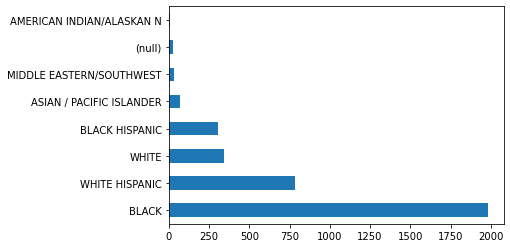

In [32]:
arrested_nogeo['SUSPECT_RACE_DESCRIPTION'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

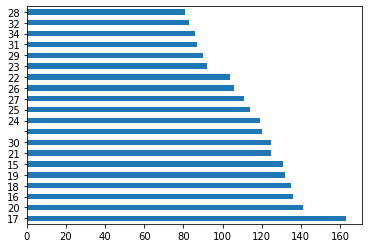

In [33]:
arrested_nogeo['SUSPECT_REPORTED_AGE'].value_counts()[:20].plot(kind='barh')

The above two graphs rank the race and age of the arrested individuals by frequency. It is based entirely on data, and there is no ethical problem; black people and young people between the ages of 15 and 30 will have a higher proportion and are more likely to be arrested. Because there is insufficient contextual information, it is impossible to tell whether arrests are due to these characteristics or whether the characteristics are causing more arrests because of extrinsic factors. However, arrests under this feature are more significant and more frequent.

Because this individual characteristic showed a higher frequency of arrests in blacks, the distribution was visualised for this characteristic to analyse its distribution in more depth.

In [34]:
arrested_blk = arrested.loc[data_geo['SUSPECT_RACE_DESCRIPTION'] == 'BLACK']

In [35]:
arrested_blk
arrested_blk = gpd.GeoDataFrame(arrested_blk, crs='epsg:4326')

In [36]:
#arrested_blk = pd.merge(arrested_blk, gdf, left_on='geometry', right_on='geometry', how='left').reset_index()
#arrested_blk.shape

In [37]:
arrested_blk

,STOP_FRISK_DATE,STOP_FRISK_TIME,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,...,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,geometry,lon,lat
0,01/01/2020,01:12:00,Wednesday,2,Y,Y,Y,N,Y,Y,...,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (-73.95363 40.77602),-73.9536,40.7760
3,01/01/2020,10:18:00,Wednesday,10,Y,Y,Y,Y,Y,N,...,33,MALE,BLACK,MED,1018441,181412,BROOKLYN,POINT (-73.87676 40.66455),-73.8768,40.6646
12,01/01/2020,16:16:00,Wednesday,6,Y,Y,Y,Y,Y,N,...,38,MALE,BLACK,MED,987495,190615,BROOKLYN,POINT (-73.98830 40.68988),-73.9883,40.6899
20,01/01/2020,03:45:00,Wednesday,1,N,N,N,N,Y,N,...,21,MALE,BLACK,THN,986497,192168,BROOKLYN,POINT (-73.99190 40.69414),-73.9919,40.6941
22,01/01/2020,19:02:00,Wednesday,0,Y,Y,Y,N,Y,N,...,50,MALE,BLACK,MED,1001099,183758,BROOKLYN,POINT (-73.93926 40.67104),-73.9393,40.6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,27/11/2020,09:35:00,Friday,30,Y,Y,Y,Y,Y,Y,...,13,MALE,BLACK,THN,1006785,233343,BRONX,POINT (-73.91860 40.80713),-73.9186,40.8071
9536,11/01/2020,21:44:00,Saturday,11,N,N,Y,(,Y,Y,...,64,MALE,BLACK,THN,1026785,203046,QUEENS,POINT (-73.84655 40.72390),-73.8465,40.7239
9537,28/12/2020,14:28:00,Monday,5,Y,Y,Y,N,Y,N,...,36,MALE,BLACK,THN,1020316,239179,BRONX,POINT (-73.86969 40.82310),-73.8697,40.8231
9541,12/12/2020,01:45:00,Saturday,2,Y,Y,Y,N,Y,Y,...,16,MALE,BLACK,THN,1010145,182898,BROOKLYN,POINT (-73.90666 40.66866),-73.9067,40.6687


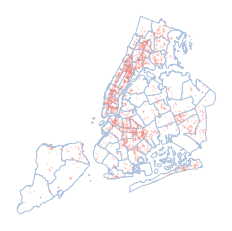

<Figure size 648x432 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig = plt.figure(figsize=(9,6))
ax.axis('off')

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

gdf.plot(ax=ax, color='white', edgecolor='lightsteelblue')
arrested_blk.plot(ax=ax, marker='o', color='salmon', markersize=0.8, alpha = 0.2)



plt.show();

As you can see from the data visualisation, arrests are more densely distributed in Manhattan and Brooklyn relative to other neighbourhoods. The model will be used for more accurate analysis to obtain more convincing distributions and predictions.

Make a scatter plot between **density** (on the y axis) and **P1_001N** (on the x axis).

As can be seen from the scatterplot, areas with high populations have lower arrest intent; areas with less population have higher arrest densities. and in line with realistic logic

<AxesSubplot:xlabel='P1_001N', ylabel='density'>

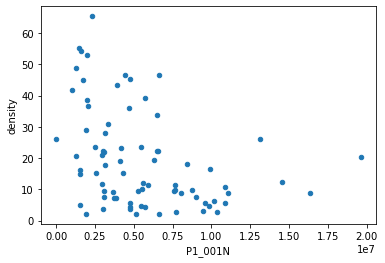

In [39]:
pointsInPolygon.plot.scatter(x= 'P1_001N', y='density')

# Methodology
## Classification
### Data Processing

In [40]:
data

,STOP_FRISK_DATE,STOP_FRISK_TIME,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_BORO_NAME,geometry
0,01/01/2020,01:12:00,Wednesday,2,Y,Y,Y,N,Y,Y,CALM,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (997094.000 222002.000)
1,01/01/2020,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,COMPLIANT,18,MALE,BLACK,THN,997094,222002,MANHATTAN,POINT (997094.000 222002.000)
2,01/01/2020,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,COMPLIANT,17,MALE,WHITE HISPANIC,MED,997094,222002,MANHATTAN,POINT (997094.000 222002.000)
3,01/01/2020,10:18:00,Wednesday,10,Y,Y,Y,Y,Y,N,COOPERATIVE,33,MALE,BLACK,MED,1018441,181412,BROOKLYN,POINT (1018441.000 181412.000)
4,01/01/2020,08:45:00,Wednesday,15,Y,N,N,N,N,N,UPSET,40,FEMALE,WHITE,MED,987763,182543,BROOKLYN,POINT (987763.000 182543.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,31/12/2020,00:20:00,Thursday,10,Y,Y,Y,N,Y,N,CONFUSED,22,MALE,WHITE HISPANIC,MED,979566,173464,BROOKLYN,POINT (979566.000 173464.000)
9540,29/12/2020,17:11:00,Tuesday,6,Y,N,N,N,N,N,CALM,48,MALE,BLACK,THN,1002918,181721,BROOKLYN,POINT (1002918.000 181721.000)
9541,12/12/2020,01:45:00,Saturday,2,Y,Y,Y,N,Y,Y,NaN,16,MALE,BLACK,THN,1010145,182898,BROOKLYN,POINT (1010145.000 182898.000)
9542,25/12/2020,15:45:00,Friday,5,Y,N,N,N,N,N,UPSET,60,MALE,BLACK,THN,1007368,189362,BROOKLYN,POINT (1007368.000 189362.000)


In [41]:
data_class = data.drop(columns=['STOP_FRISK_DATE', 'DEMEANOR_OF_PERSON_STOPPED','geometry', 'STOP_LOCATION_X', 'STOP_LOCATION_Y','STOP_LOCATION_BORO_NAME'])

data_class

,STOP_FRISK_TIME,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE
0,01:12:00,Wednesday,2,Y,Y,Y,N,Y,Y,18,MALE,BLACK,THN
1,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,18,MALE,BLACK,THN
2,01:11:00,Wednesday,5,Y,Y,N,Y,N,N,17,MALE,WHITE HISPANIC,MED
3,10:18:00,Wednesday,10,Y,Y,Y,Y,Y,N,33,MALE,BLACK,MED
4,08:45:00,Wednesday,15,Y,N,N,N,N,N,40,FEMALE,WHITE,MED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,00:20:00,Thursday,10,Y,Y,Y,N,Y,N,22,MALE,WHITE HISPANIC,MED
9540,17:11:00,Tuesday,6,Y,N,N,N,N,N,48,MALE,BLACK,THN
9541,01:45:00,Saturday,2,Y,Y,Y,N,Y,Y,16,MALE,BLACK,THN
9542,15:45:00,Friday,5,Y,N,N,N,N,N,60,MALE,BLACK,THN


The fuction of **to_datetime** is used here to convert the time format in the original data to standard datetime.

So in **data_class**, we can find the format of 'STOP_FRISK_TIME' is [yyyy-mm-dd hh:mm:ss]

In [42]:
data_class['STOP_FRISK_TIME'] = pd.to_datetime(data_class['STOP_FRISK_TIME'])
data_class

,STOP_FRISK_TIME,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE
0,2022-04-21 01:12:00,Wednesday,2,Y,Y,Y,N,Y,Y,18,MALE,BLACK,THN
1,2022-04-21 01:11:00,Wednesday,5,Y,Y,N,Y,N,N,18,MALE,BLACK,THN
2,2022-04-21 01:11:00,Wednesday,5,Y,Y,N,Y,N,N,17,MALE,WHITE HISPANIC,MED
3,2022-04-21 10:18:00,Wednesday,10,Y,Y,Y,Y,Y,N,33,MALE,BLACK,MED
4,2022-04-21 08:45:00,Wednesday,15,Y,N,N,N,N,N,40,FEMALE,WHITE,MED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,2022-04-21 00:20:00,Thursday,10,Y,Y,Y,N,Y,N,22,MALE,WHITE HISPANIC,MED
9540,2022-04-21 17:11:00,Tuesday,6,Y,N,N,N,N,N,48,MALE,BLACK,THN
9541,2022-04-21 01:45:00,Saturday,2,Y,Y,Y,N,Y,Y,16,MALE,BLACK,THN
9542,2022-04-21 15:45:00,Friday,5,Y,N,N,N,N,N,60,MALE,BLACK,THN


It can be found that most of the columns, such as FRISKED_FLAG, SEARCHED_FLAG, SUSPECT_SEX, SUSPECT_RACE_DESCRIPTION and other output values are in categorial format. In order to make the subsequent classification standardized and integrated, the interval is also distinguished for datetime. 

For example, 
* **early morining**: when the time is from '00:00' to '06:00', it will be divided into 'early_morning'; 
* **morning**: if the time is from '06:00' to '12:00', it will be divided into 'morning'; 
* **afternoon**: if the time is From '12:00' to '18:00', it is divided into 'afternoon'; 
* **night**: when the time is from '18:00' to '23:59', it is divided into 'night'.

In [43]:
data_class.set_index('STOP_FRISK_TIME', inplace=True)

data_class.loc[data_class.between_time('00:00','06:00').any(1).index,'TIME']='early_morning'
data_class.loc[data_class.between_time('06:00','12:00').any(1).index,'TIME']='morning'
data_class.loc[data_class.between_time('12:00','18:00').any(1).index,'TIME']='afternoon'
data_class.loc[data_class.between_time('18:00','23:59').any(1).index,'TIME']='night'

data_class

,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,TIME
STOP_FRISK_TIME,,,,,,,,,,,,,
2022-04-21 01:12:00,Wednesday,2,Y,Y,Y,N,Y,Y,18,MALE,BLACK,THN,early_morning
2022-04-21 01:11:00,Wednesday,5,Y,Y,N,Y,N,N,18,MALE,BLACK,THN,early_morning
2022-04-21 01:11:00,Wednesday,5,Y,Y,N,Y,N,N,17,MALE,WHITE HISPANIC,MED,early_morning
2022-04-21 10:18:00,Wednesday,10,Y,Y,Y,Y,Y,N,33,MALE,BLACK,MED,morning
2022-04-21 08:45:00,Wednesday,15,Y,N,N,N,N,N,40,FEMALE,WHITE,MED,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21 00:20:00,Thursday,10,Y,Y,Y,N,Y,N,22,MALE,WHITE HISPANIC,MED,early_morning
2022-04-21 17:11:00,Tuesday,6,Y,N,N,N,N,N,48,MALE,BLACK,THN,afternoon
2022-04-21 01:45:00,Saturday,2,Y,Y,Y,N,Y,Y,16,MALE,BLACK,THN,early_morning


Dropping INDEX

In [44]:
data_class = data_class.reset_index(drop=True)
data_class

,DAY2,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,TIME
0,Wednesday,2,Y,Y,Y,N,Y,Y,18,MALE,BLACK,THN,early_morning
1,Wednesday,5,Y,Y,N,Y,N,N,18,MALE,BLACK,THN,early_morning
2,Wednesday,5,Y,Y,N,Y,N,N,17,MALE,WHITE HISPANIC,MED,early_morning
3,Wednesday,10,Y,Y,Y,Y,Y,N,33,MALE,BLACK,MED,morning
4,Wednesday,15,Y,N,N,N,N,N,40,FEMALE,WHITE,MED,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Thursday,10,Y,Y,Y,N,Y,N,22,MALE,WHITE HISPANIC,MED,early_morning
9540,Tuesday,6,Y,N,N,N,N,N,48,MALE,BLACK,THN,afternoon
9541,Saturday,2,Y,Y,Y,N,Y,Y,16,MALE,BLACK,THN,early_morning
9542,Friday,5,Y,N,N,N,N,N,60,MALE,BLACK,THN,afternoon


DAY2 records the occurrence of the event in week format. If the format is directly substituted into the classification model, the process will become complicated. 

The week format should be divided into **weekdays** and **weekends** before substituting into the model.

In [45]:
m1 = data_class['DAY2'].str.contains("Monday|Tuesday|Wednesday|Thursday|Friday")
m2 = data_class['DAY2'].str.contains("Saturday|Sunday")

data_class['WEEK'] = np.select([m1,m2], ['weekday','weekend'], default='unknown')

In [46]:
data_class = data_class.drop(columns=['DAY2'])
data_class

,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,SUSPECT_ARRESTED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,TIME,WEEK
0,2,Y,Y,Y,N,Y,Y,18,MALE,BLACK,THN,early_morning,weekday
1,5,Y,Y,N,Y,N,N,18,MALE,BLACK,THN,early_morning,weekday
2,5,Y,Y,N,Y,N,N,17,MALE,WHITE HISPANIC,MED,early_morning,weekday
3,10,Y,Y,Y,Y,Y,N,33,MALE,BLACK,MED,morning,weekday
4,15,Y,N,N,N,N,N,40,FEMALE,WHITE,MED,morning,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,10,Y,Y,Y,N,Y,N,22,MALE,WHITE HISPANIC,MED,early_morning,weekday
9540,6,Y,N,N,N,N,N,48,MALE,BLACK,THN,afternoon,weekday
9541,2,Y,Y,Y,N,Y,Y,16,MALE,BLACK,THN,early_morning,weekend
9542,5,Y,N,N,N,N,N,60,MALE,BLACK,THN,afternoon,weekday


Create a new dataframe called `data_class_arrest` that includes all attributes from `data_class` except the `SUSPECT_ARRESTED_FLAG` attribute. 

In [47]:
data_class_arrest= data_class.drop(columns=['SUSPECT_ARRESTED_FLAG'])

data_class_arrest

,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,TIME,WEEK
0,2,Y,Y,Y,N,Y,18,MALE,BLACK,THN,early_morning,weekday
1,5,Y,Y,N,Y,N,18,MALE,BLACK,THN,early_morning,weekday
2,5,Y,Y,N,Y,N,17,MALE,WHITE HISPANIC,MED,early_morning,weekday
3,10,Y,Y,Y,Y,N,33,MALE,BLACK,MED,morning,weekday
4,15,Y,N,N,N,N,40,FEMALE,WHITE,MED,morning,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...
9539,10,Y,Y,Y,N,N,22,MALE,WHITE HISPANIC,MED,early_morning,weekday
9540,6,Y,N,N,N,N,48,MALE,BLACK,THN,afternoon,weekday
9541,2,Y,Y,Y,N,Y,16,MALE,BLACK,THN,early_morning,weekend
9542,5,Y,N,N,N,N,60,MALE,BLACK,THN,afternoon,weekday


Now we will create the label dataset (the `y` variable) by transforming the `SUSPECT_ARRESTED_FLAG` variable into numerics. To do this, we'll use the `LabelEncoder`. This function takes a column of target labels and encode target labels with value between 0 and `n_classes - 1`.

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # creates the LabelEncoder object
le.fit(['N', 'Y']) # we explicitly encode '<=50k' and '>50k' with 0 and 1, respectively
label_y = le.transform(data_class['SUSPECT_ARRESTED_FLAG']) # runs LabelEncoder on the over50k column

In [49]:
from sklearn.feature_extraction import DictVectorizer

data_dict_arrest = data_class_arrest.to_dict('records')
vec_arrest = DictVectorizer()  # create the DictVectorizer object
vec_arrest_array = vec_arrest.fit_transform(data_dict_arrest).toarray()  # execute process on the record dictionaries and transform the result into a numpy array object

vec_arrest_array

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [50]:
print("Number of variables in this transformed data: {}".format(vec_arrest_array.shape[1]))

Number of variables in this transformed data: 112


In [51]:
vec_arrest.get_feature_names()

['ASK_FOR_CONSENT_FLG=(',
 'ASK_FOR_CONSENT_FLG=N',
 'ASK_FOR_CONSENT_FLG=Y',
 'FRISKED_FLAG=N',
 'FRISKED_FLAG=Y',
 'OFFICER_EXPLAINED_STOP_FLAG=N',
 'OFFICER_EXPLAINED_STOP_FLAG=Y',
 'SEARCHED_FLAG=N',
 'SEARCHED_FLAG=Y',
 'STOP_DURATION_MINUTES',
 'SUSPECT_BODY_BUILD_TYPE=(null)',
 'SUSPECT_BODY_BUILD_TYPE=HEA',
 'SUSPECT_BODY_BUILD_TYPE=MED',
 'SUSPECT_BODY_BUILD_TYPE=THN',
 'SUSPECT_BODY_BUILD_TYPE=U',
 'SUSPECT_BODY_BUILD_TYPE=XXX',
 'SUSPECT_RACE_DESCRIPTION=(null)',
 'SUSPECT_RACE_DESCRIPTION=AMERICAN INDIAN/ALASKAN N',
 'SUSPECT_RACE_DESCRIPTION=ASIAN / PACIFIC ISLANDER',
 'SUSPECT_RACE_DESCRIPTION=BLACK',
 'SUSPECT_RACE_DESCRIPTION=BLACK HISPANIC',
 'SUSPECT_RACE_DESCRIPTION=MIDDLE EASTERN/SOUTHWEST',
 'SUSPECT_RACE_DESCRIPTION=WHITE',
 'SUSPECT_RACE_DESCRIPTION=WHITE HISPANIC',
 'SUSPECT_REPORTED_AGE= ',
 'SUSPECT_REPORTED_AGE=0',
 'SUSPECT_REPORTED_AGE=11',
 'SUSPECT_REPORTED_AGE=12',
 'SUSPECT_REPORTED_AGE=13',
 'SUSPECT_REPORTED_AGE=14',
 'SUSPECT_REPORTED_AGE=15',
 'SUSP

The final stage of data processing involves splitting the prepared dataset into training and testing subsets. The training data will be used to create the classifier. The test data will then be used to test the accuracy of the classification. The `train_test_split` method randomly splits our attribute and label data into training and testing subsets. Not only does this give us a format to load directly into the classifier, but the random split ensures a good mix of records.

It can be seen from the length that there are **7158** train datasets and **2386** test datasets. According to the proportion, 75% of the dataset is divided into train, and the rest is divided into test.

In [52]:
from sklearn.model_selection import train_test_split

random_state_split = 1024
train_d, test_d, train_lab, test_lab = train_test_split(vec_arrest_array, label_y, random_state=random_state_split)

len(train_d),len(test_d),len(train_lab),len(test_lab)

(7158, 2386, 7158, 2386)

### Artificial Neural Networks (ANN)

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
%%time
random_state_ann = 100
# add timing script
ann_clf = MLPClassifier(random_state = random_state_ann)  # creates the ANN classifier using the default parameters
ann_clf.fit(train_d, train_lab)

CPU times: user 20.7 s, sys: 23.9 s, total: 44.6 s
Wall time: 7.58 s


/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=100)

In [55]:
# to predict the most likely class
print("The predicted class of the first individual: {}".format(ann_clf.predict(train_d[0:100, :])))

# to predict the probability distribution over classes 
# the output is a list of two values, which corresponds to the probability of belonging to Class 0 and 1
print("The predicted probability of the first individual: {}".format(ann_clf.predict_proba(train_d[0:1, :])))

The predicted class of the first individual: [1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0]
The predicted probability of the first individual: [[0.09772628 0.90227372]]


In [56]:
ann_clf.score(test_d, test_lab)

0.8005029337803856

In [57]:
predictions = ann_clf.predict(test_d)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [58]:
predicted = pd.DataFrame(list(le.inverse_transform(predictions)))
print(predicted)

      0
0     N
1     N
2     N
3     N
4     Y
...  ..
2381  N
2382  Y
2383  Y
2384  N
2385  N

[2386 rows x 1 columns]


After dividing the dataset into training and testing subsets.
Use a classifier to associate feature attributes in the training dataset to *known* classifications (called *training* or *calibration*). 
* In the ANN model, we take the output (predicted column): 'SUSPECT_ARRESTED_FLAG' out and train it with other categories.

Test the strength of the model fit (called *testing* or *validation*) by predicting the classification in the test dataset.
* *accuracy_score* is used in ANN to calculate whether the model predicts accurately.

In [59]:
from sklearn import metrics
print("Classifcation accuracy: ")
print(metrics.accuracy_score(test_lab, predictions))

Classifcation accuracy: 
0.8005029337803856


In [60]:
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

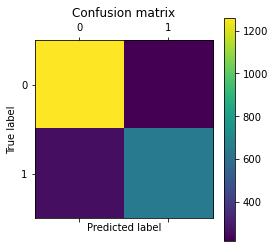

In [61]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [62]:
print("Classification results: ")
print(metrics.classification_report(test_lab, predictions))

Classification results: 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1479
           1       0.75      0.72      0.73       907

    accuracy                           0.80      2386
   macro avg       0.79      0.78      0.79      2386
weighted avg       0.80      0.80      0.80      2386



In the confusion matrix above, it can be found that there is high accuracy for 0, that is, events that have not been arrested, and the number of false positives is much lower than the accurate number. From the classification results, it can be found that the unarrested events have a higher f1-score relative to the arrested events. Overall, its score is relatively satisfactory, but it is still necessary to observe other models for comparison to give the optimal model.

### Random Forest Classifer

In [63]:
from sklearn.ensemble import RandomForestClassifier

random_state_RF = 200
forest_clf = RandomForestClassifier(random_state = random_state_RF)

forest_clf.fit(train_d,train_lab)

print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.9937133277451802
The accuracy of this classifier on the test data is:0.8235540653813914


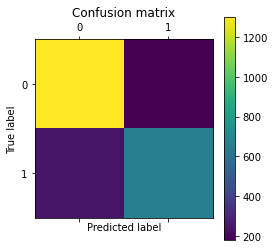

In [64]:
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [65]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1479
           1       0.79      0.73      0.76       907

    accuracy                           0.82      2386
   macro avg       0.82      0.81      0.81      2386
weighted avg       0.82      0.82      0.82      2386



### Hyperparameter tuning for random forests

We have a total of 9,544 pieces of data. We use 7,158 pieces of data as training data and the remaining 2,386 pieces of data as test data. By continuously tuning the parameters of the random forest, we find the random forest model with the most accurate predictions on the test results.

Before the specific experiment, let's take a look at using the random forest model. The variables that need to be tested are:

* **max_features**

Increasing max_features generally improves the model's performance because, at each node, we have more options to consider. However, this is not necessarily true, as it reduces the diversity of individual trees, which is a unique advantage of random forests. However, the algorithm's speed will inevitably be slowed down by increasing max_features. Therefore, proper balance and selection of optimal max_features are required.

* **n_estimators**

The number of subtrees you want to build before using the maximum number of votes or average to make predictions. More subtrees can give the model better performance but, at the same time, make your code slower. The highest possible value should be chosen, making the prediction better and more stable.

In [66]:
%%time
# number of fold as 5
cv_fold=5

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

clf = RandomForestClassifier()

# call the cross_val_score function
scores = cross_val_score(clf, train_d, train_lab, cv=cv_fold)
# note that this is an array
print(scores) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.82332402 0.83100559 0.82821229 0.83508036 0.82389937]
Accuracy: 0.83 (+/- 0.00)
CPU times: user 3.88 s, sys: 76.6 ms, total: 3.96 s
Wall time: 3.91 s


In [67]:
from sklearn import model_selection

In [68]:
%%time

# values of max_depth. 6 values ranging from 10 to 100 - what is the step length here?
list_max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]

# values of n_estimators
list_n_estimators = [50, 100, 200, 300, 400]
# create a grid of the two hyperparameters
grid_hyperparameters = {'n_estimators':list_n_estimators,
                       'max_depth': list_max_depth}

random_state_rf = 300

rf = RandomForestClassifier(random_state_rf)

clf = model_selection.GridSearchCV(rf, grid_hyperparameters)

clf.fit(train_d, train_lab)

CPU times: user 3min 31s, sys: 1.8 s, total: 3min 33s
Wall time: 3min 33s


GridSearchCV(estimator=RandomForestClassifier(n_estimators=300),
             param_grid={'max_depth': [10, 30, 50, 70, 90, 110],
                         'n_estimators': [50, 100, 200, 300, 400]})

In [69]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'n_estimators': 50}
The best score is: 
0.8362699054066187


**It can be found that after testing the parameters of the random forest, the best score obtained is higher than the previous ANN model. That is to say, in this data set, when using the random forest model and n estimator=100, max depth=10, there is the most accurate and optimal prediction model.**

## Clustering

In [70]:
def mapping_clusters(labels_cluster):
    ppd['cluster_nm'] = labels_cluster
    ppd.plot(column='cluster_nm', categorical=True, legend=True, figsize=(12,8), cmap='Paired');
    
    

# adapted from this tutorial: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(df_cluster_centroid):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()

In [71]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN

from scipy.cluster.hierarchy import dendrogram

import spopt
from spopt.region import MaxPHeuristic as MaxP
import matplotlib.pyplot as plt

import libpysal
import warnings

### Variable Selection and Standardisation

In [72]:
ppd = gdf

ppd

,precinct,shape_area,shape_leng,geometry
0,1.0000,"47,314,020.1300","80,963.4952","MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,5.0000,"18,088,797.9642","18,676.1243","POLYGON ((-73.98864 40.72293, -73.98869 40.722..."
2,6.0000,"22,098,189.5606","26,402.8998","POLYGON ((-73.99968 40.73855, -73.99684 40.737..."
3,71.0000,"45,331,787.1744","29,978.0943","POLYGON ((-73.92854 40.66457, -73.92872 40.664..."
4,72.0000,"104,622,705.8350","88,402.0460","POLYGON ((-73.99841 40.67187, -73.99830 40.671..."
5,7.0000,"18,364,020.9417","17,301.3084","POLYGON ((-73.97345 40.71896, -73.97351 40.718..."
6,9.0000,"21,394,233.5887","19,773.2330","POLYGON ((-73.97161 40.72672, -73.97163 40.726..."
7,22.0000,"38,301,388.6636","32,701.3492","POLYGON ((-73.94923 40.79687, -73.94942 40.796..."
8,10.0000,"27,267,320.7968","40,281.5280","POLYGON ((-74.00139 40.76285, -74.00051 40.762..."
9,13.0000,"29,508,893.7151","27,719.1719","POLYGON ((-73.98156 40.74388, -73.97996 40.743..."


In [73]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

normed = pointsInPolygon.copy()
for c in pointsInPolygon.columns.values:
    normed[c] = rs.fit_transform(pointsInPolygon[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of P1_001N is [-0.5516189931111699, 1.717576958144234]
The range of density is [-0.3180125583802751, 1.2288878878418614]


,P1_001N,density
0,-0.2082,0.1471
1,-0.3819,0.9816
2,0.0020,0.7364
3,-0.3638,0.9613
4,-0.0418,0.7728


The role of standardisation is to remove or impute missing values and detect and eliminate noisy data and outliers. In this way, the accuracy and reliability of subsequent clustering can be achieved. The clustering in this study mainly tested two sets of data: **the population** of each police precinct and its **arrest density**. After standardisation, the data will be stored in the **normed** variable.

### Functions
#### DBSCAN

In [74]:
normed.shape[1]

2

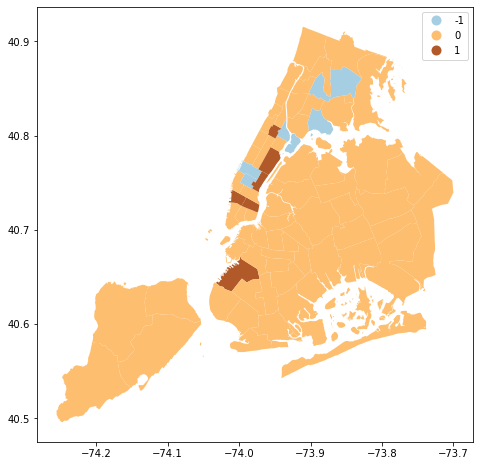

In [75]:
minPts = 3 # we set minPts as normed.shape[1] + 1 
epsilon = 0.2
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(normed)

# We now have our DBSCAN object created, and we can extract the groups it has identified. We do this using the `.labels_` method.
cluster_nm = dbsc.labels_

mapping_clusters(cluster_nm)

In [76]:
pd.Series(dbsc.labels_).value_counts()

 0    65
 1     6
-1     6
dtype: int64

In [77]:
from sklearn import metrics
metrics.silhouette_score(normed, dbsc.labels_)

0.1837386041569444

There are 2 clusters on the map. A value of **-1** represents outliers. It can be found that the value of **1** is very small relative to **0**, and there are only six police precincts. This is also similar to the spatial distribution map we did before; that is, the some of police precinct in **Berkeley** and **Manhattan** have the same cluster.

According to the silhouette score, it can be seen that the score of DBSCAN is 0.18, which is close to 0. Therefore, it is believed that the two distributions are mainly independent.

#### KMeans

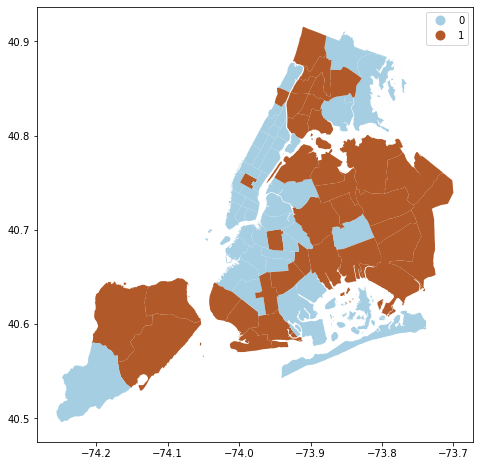

In [78]:
from sklearn.cluster import KMeans

k_cluster = 2
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)

mapping_clusters(kmeans_method.labels_);

Exclude outliers according to the clusters given by DBSCAN; we will try **k_cluster = 2**. and display the map.

Next, I will use the Elbow method to choose the k value. Elbow's method aims to determine the value of k where the distortion starts to drop the fastest. It can be seen from the figure that the value of elbow starts to decrease steadily at 3, so KMeans is performed with **k_cluster = 3.**

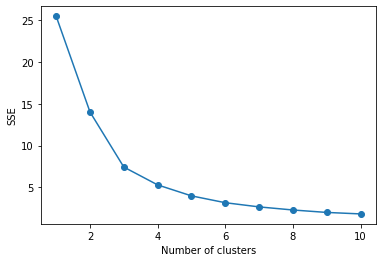

In [79]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(normed)
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

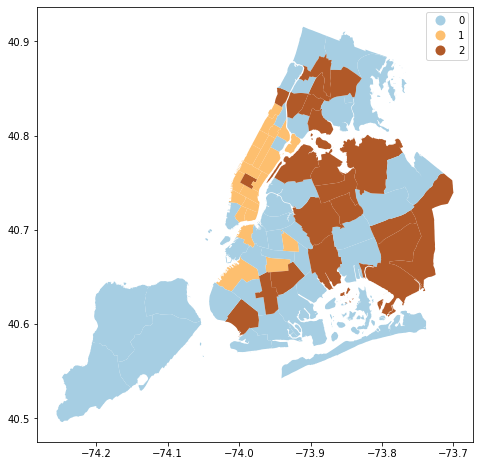

In [83]:
k_cluster = 3
random_seed = 123
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)

# plotting
mapping_clusters(kmeans_method.labels_);

From the above figure, when k_cluster is equal to 3, some police precincts in Brooklyn and Manhattan have the same cluster; and some police precincts in northern Brooklyn, northern Manhattan, and Queens have the same cluster. This also shows that the distribution of its arrest density presents three different clusters.

In [86]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, leaf_rotation=90., **kwargs)

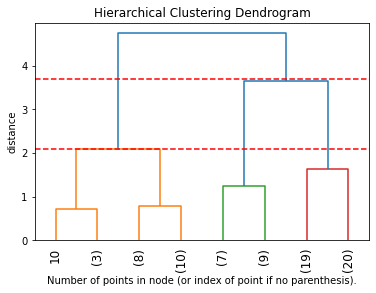

In [91]:
   agg_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(normed)
ax = plt.gca()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_cluster, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel('distance')
plt.hlines(2.1, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.hlines(3.7, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='r')
plt.show()

The dendrogram shows a large gap between distance 2.1 and the next merge (space around 3.7). The distance gap is highlighted by two red dashed lines. This distance gap in the dendrogram is significant because it indicates that the next merge may not happen in reality. Therefore, the merged ones here are likely not to belong to the same cluster, meaning the three clusters here are more suitable. This again verifies that in KMeans, we are using the distribution of 3 clusters correctly and provide meaningful visualisations

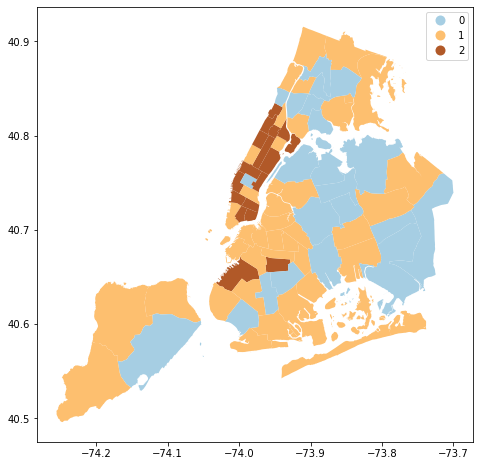

In [84]:
agg_cluster = AgglomerativeClustering(distance_threshold=None, n_clusters=3).fit(normed)
mapping_clusters(agg_cluster.labels_)

In [85]:
pd.Series(agg_cluster.labels_).value_counts()

1    39
0    22
2    16
dtype: int64

# Discussion

The research consists of classification prediction and clustering, respectively. The former is to predict individual characteristics to determine whether to be arrested; it can be found that when the random forest is used, it has a higher accuracy value. Similarly, when clustering the overall arrest density, it can be judged that the party cluster=3 has a better distribution. Because the dataset presents discrete values, regression prediction was not used in the study.

# Conclusion

In today's 21st century, the crime rate of a city or a region can directly affect the city's happiness index. The crime rate can be closely related to the characteristics of the arrested individuals and the density of the area where they are arrested. When it comes to the characteristics of individuals arrested, the topic is controversial and more prone to unethical research. Based entirely on the data provided by the dataset, this study analyses from the perspective of subjective arrests by police officers, those individuals whose characteristics are stereotyped or are more likely to be vulnerable groups, thereby revealing existing social problems. According to the density of arrests, we can know whether some areas with a sparse population or low per capita disposable GDP will make local police officers more sensitive and more likely to have some stereotypes of vulnerable groups, leading to regional clustering.

# Reference List

[1] Bowling, Ben and Phillips, Coretta(2007). Disproportionate and discriminatory: Reviewing the evidence on police stop and search

[2] Garnier, Simon and Caplan, Joel M and Kennedy, Leslie W. Predicting dynamical crime distribution from environmental and social influences